## Spotify 'StreamingHistory0' data from June 27, 2023 - August 15, 2023

In [7]:
import pandas as pd # importing needed libraries/modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from IPython.display import Image
import warnings ; warnings.warn = lambda *args,**kwargs: None

In [32]:
def load_data(file):
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
df = pd.read_excel('StreamingHistory_music_0.json.xlsx') #loading file into df
df

,endTime,date,wkday,time,artistName,trackName,msPlayed,minPlayed,Include Song
0,2023-06-27 21:56,2023-06-27,Tue,21:56,Lil Peep,nuts,4387,0.073117,No
1,2023-06-28 01:44,2023-06-28,Wed,01:44,Lil Peep,nuts,80492,1.341533,No
2,2023-06-28 01:45,2023-06-28,Wed,01:45,XXXTENTACION,Guardian angel,108034,1.800567,No
3,2023-06-28 01:47,2023-06-28,Wed,01:47,The Wonder Years,Dismantling Summer,93973,1.566217,No
4,2023-06-28 01:47,2023-06-28,Wed,01:47,Sorority Noise,Windowwww,597,0.009950,No
...,...,...,...,...,...,...,...,...,...
9995,2023-08-15 17:39,2023-08-15,Tue,17:39,BROCKHAMPTON,1999 WILDFIRE,719,0.011983,No
9996,2023-08-15 17:39,2023-08-15,Tue,17:39,BROCKHAMPTON,1999 WILDFIRE,162,0.002700,No
9997,2023-08-15 17:39,2023-08-15,Tue,17:39,nascar aloe,FEET!,766,0.012767,No
9998,2023-08-15 17:39,2023-08-15,Tue,17:39,nascar aloe,FEET!,139,0.002317,No


In [33]:
skippedsongs = df[ df['Include Song'] == 'No'].index # assigning variable to skipped songs, played for less than 2 mins
df.drop(skippedsongs, inplace = True) # dropping skipped songs from df
df

,endTime,date,wkday,time,artistName,trackName,msPlayed,minPlayed,Include Song
45,2023-06-28 01:50,2023-06-28,Wed,01:50,YOU LOSE,No Rules,145853,2.430883,Yes
92,2023-06-28 02:15,2023-06-28,Wed,02:15,Michael Jackson,Rock with You - Single Version,215434,3.590567,Yes
142,2023-06-28 02:22,2023-06-28,Wed,02:22,Drake,Too Much,245527,4.092117,Yes
143,2023-06-28 02:26,2023-06-28,Wed,02:26,The Kid LAROI,NOT SOBER (feat. Polo G & Stunna Gambino),204483,3.408050,Yes
159,2023-06-28 02:34,2023-06-28,Wed,02:34,Frank Ocean,White Ferrari,248807,4.146783,Yes
...,...,...,...,...,...,...,...,...,...
9909,2023-08-15 17:19,2023-08-15,Tue,17:19,Lancey Foux,LANCEY OR LANCEY,122996,2.049933,Yes
9910,2023-08-15 17:24,2023-08-15,Tue,17:24,Flap Peacock,DiE!,291131,4.852183,Yes
9918,2023-08-15 17:28,2023-08-15,Tue,17:28,Rage Against The Machine,Bulls On Parade,214854,3.580900,Yes
9933,2023-08-15 17:31,2023-08-15,Tue,17:31,Elroy,TALKIN IN MY SLEEP,173847,2.897450,Yes


In [34]:
df.count() # to see how many values are in each column; checking for null values (and getting rid of them!)

endTime         1669
date            1669
wkday           1669
time            1669
artistName      1669
trackName       1669
msPlayed        1669
minPlayed       1669
Include Song    1669
dtype: int64

In [35]:
df.shape # (rows, columns)

(1669, 9)

## Goal: What day of the week are songs streamed most?

In [36]:
df[['date','wkday','minPlayed']] # calling our columns from df

,date,wkday,minPlayed
45,2023-06-28,Wed,2.430883
92,2023-06-28,Wed,3.590567
142,2023-06-28,Wed,4.092117
143,2023-06-28,Wed,3.408050
159,2023-06-28,Wed,4.146783
...,...,...,...
9909,2023-08-15,Tue,2.049933
9910,2023-08-15,Tue,4.852183
9918,2023-08-15,Tue,3.580900
9933,2023-08-15,Tue,2.897450


In [37]:
day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] # assigning a variable to the week days to keep them in order for visuals

In [38]:
mins=df.groupby('wkday')['minPlayed'].sum().reindex(day) # counting up minutes played each day of the week for the data period
mins

wkday
Mon     996.617000
Tue     865.914783
Wed     976.207800
Thu     681.818817
Fri     546.131517
Sat     702.562133
Sun    1055.290467
Name: minPlayed, dtype: float64

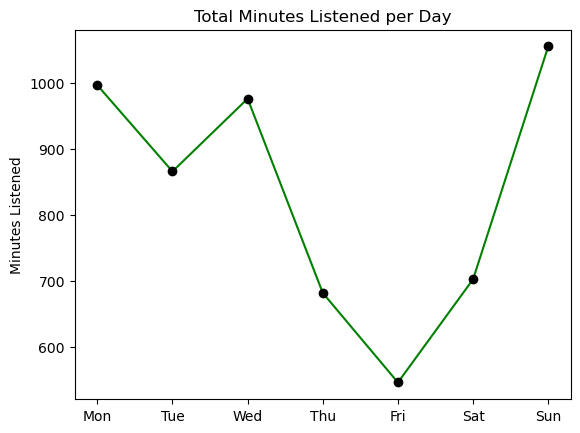

In [11]:
# creating the graph to display minutes listened on each day
min_day=df.groupby('wkday')['minPlayed'].sum().reindex(day)
plt.plot(min_day, color='Green', marker='o', mfc='black', mec= 'k')
#mfc = marker face color, mec = marker edge color
plt.ylabel('Minutes Listened')
plt.title('Total Minutes Listened per Day')
plt.show()

## Goal: Top 10 Streamed Songs

In [39]:
pd.value_counts(df['trackName']) # viewing number of times each track appears in data

trackName
SUNDOWN TOWN             51
Unknown Track            43
Escape From LA           25
Animals                  23
Sad People               23
                         ..
Look at the Sky           1
Meme Graveyard            1
Your Luv                  1
Torque - Gammer Remix     1
Судно (Борис Рижий)       1
Name: count, Length: 909, dtype: int64

In [40]:
pd.value_counts(df['trackName']).head(10) # displays first 10 tracks in the 'trackName' column

trackName
SUNDOWN TOWN                     51
Unknown Track                    43
Escape From LA                   25
Animals                          23
Sad People                       23
Stunt On Ghosts (feat. Mansa)    20
MONEY POWER FAME                 19
No Bap                           18
War Ready                        17
Carefree                         17
Name: count, dtype: int64

Text(0.5, 0, 'Songs')

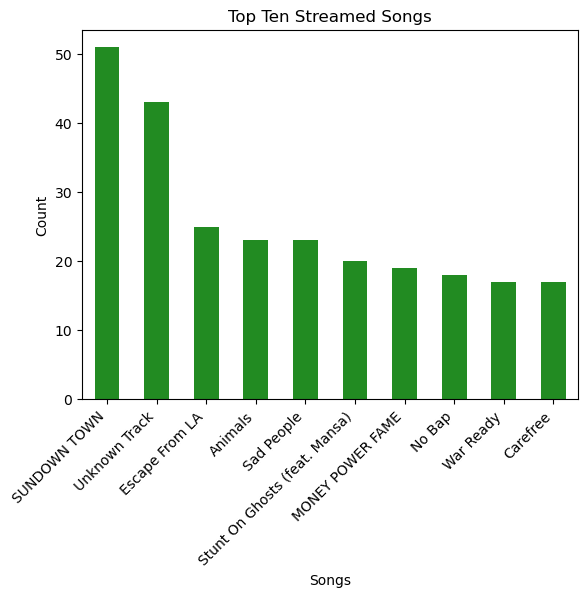

In [41]:
pd.value_counts(df['trackName']).head(10).plot(kind='bar' ,color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Streamed Songs')
plt.ylabel('Count')
plt.xlabel('Songs')

In [ ]:
Findings: Maybe Spotify can start playing more tracks for me that sound like SUNDOWN TOWN by Vince Staples

## Goal: Top 20 Streamed Artists

In [42]:
pd.value_counts(df['artistName']) # counting amount of times artist was streamed

artistName
Vince Staples        51
Lil Darkie           46
Unknown Artist       43
Guapdad 4000         41
Drake                35
                     ..
Waka Flocka Flame     1
Portwave              1
Mayday Parade         1
Ameer Vann            1
Huron John            1
Name: count, Length: 414, dtype: int64

In [43]:
pd.value_counts(df['artistName']).head(20) # printing the top 20 streamed artists

artistName
Vince Staples         51
Lil Darkie            46
Unknown Artist        43
Guapdad 4000          41
Drake                 35
Kid Cudi              35
Mac Miller            33
The Weeknd            30
LUCKI                 26
Architects            25
Autumn!               23
Future                22
Billie Eilish         21
Tyler, The Creator    21
Smino                 20
Juice WRLD            20
BROCKHAMPTON          20
A Day To Remember     19
Meek Mill             19
Mick Jenkins          17
Name: count, dtype: int64

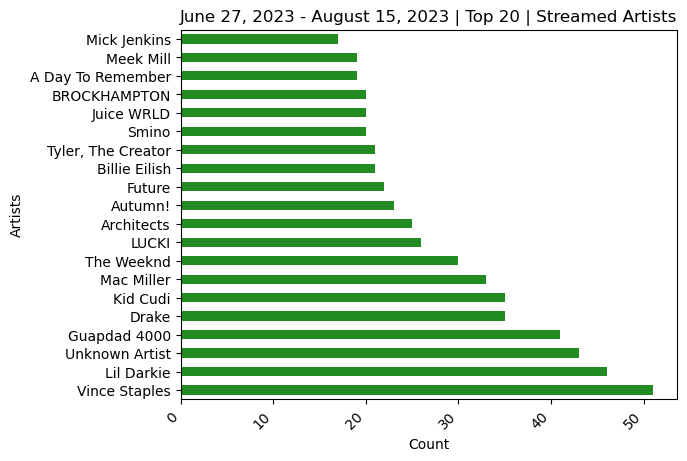

In [44]:
pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('June 27, 2023 - August 15, 2023 | Top 20 | Streamed Artists')
plt.ylabel('Artists')
plt.xlabel('Count')
figsize=(100,100)

## Goal: How many songs are on each playlist

In [19]:
def load_data(file):
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
playlists = pd.read_excel('Playlist1.json.xlsx') #loading file into df
playlists

,playlists,name,lastModifiedDate,description,numberOfFollowers,items,track,trackName,artistName,albumName,trackUri,episode,episodeName,showName,episodeUri,audiobook,localTrack,uri,addedDate
0,NaN,My Playlist #28,2024-06-10,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,for dad :),2024-06-16,"happy fathers days, here’s a few songs i think...",0.0,NaN,NaN,Suede,NxWorries,Yes Lawd!,spotify:track:0iizrCBnUUJuAwCPJaWWY0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-17
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late Night (feat. Masego),GoldLink,"And After That, We Didn't Talk",spotify:track:60ZZNXIdwgUGkVGRt7foLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Let Me Know,Brent Faiyaz,Fuck The World,spotify:track:0dJhXJKZTpiaxTUc7uItIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Morning Love [Feat. Samora Pinderhughes],Common,Let Love,spotify:track:4bePotuNPRFTpAJB4udtDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gotham City,Bladee,Gotham City,spotify:track:2whKOvkZ8mNLbinpYsKt3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-10
2799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sesame Street,Bladee,Sesame Street,spotify:track:3cn9YWXth1SkiyuIsPNJl6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-10
2800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trial,Bladee,Exile,spotify:track:6SVOZ3zEbwK2JXVMDWYFQp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-10
2801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sentence,Bladee,Exile,spotify:track:2MziEjp3gaYz7HlSs16zf7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-10


In [20]:
playlists.count() # count of values in each columns of the dataset

playlists               0
name                   28
lastModifiedDate       28
description            14
numberOfFollowers      28
items                   0
track                   0
trackName            2647
artistName           2647
albumName            2647
trackUri             2647
episode                 0
episodeName             1
showName                1
episodeUri              1
audiobook               0
localTrack              0
uri                   152
addedDate            2800
dtype: int64

In [21]:
playlists=playlists.drop(['playlists','items','track','episode','audiobook','localTrack','numberOfFollowers','trackUri'], axis = 1) 
playlists.count()#cleaning the data by removing columns that do not help with the goal

name                  28
lastModifiedDate      28
description           14
trackName           2647
artistName          2647
albumName           2647
episodeName            1
showName               1
episodeUri             1
uri                  152
addedDate           2800
dtype: int64

In [22]:
playlists.count()

name                  28
lastModifiedDate      28
description           14
trackName           2647
artistName          2647
albumName           2647
episodeName            1
showName               1
episodeUri             1
uri                  152
addedDate           2800
dtype: int64

In [23]:
playlists=playlists.drop(['description', 'episodeName', 'showName', 'episodeUri'], axis = 1) #dropping unneedee columns

In [24]:
playlists.count()

name                  28
lastModifiedDate      28
trackName           2647
artistName          2647
albumName           2647
uri                  152
addedDate           2800
dtype: int64

In [46]:
playlists=playlists.drop(['uri', 'addedDate'], axis = 1) # more dropping lol

In [47]:
playlists.count()

name                  28
lastModifiedDate      28
trackName           2647
artistName          2647
albumName           2647
dtype: int64

In [48]:
playlists # pulling up df NOW with dropped columns

,name,lastModifiedDate,trackName,artistName,albumName
0,My Playlist #28,2024-06-10,NaN,NaN,NaN
1,for dad :),2024-06-16,Suede,NxWorries,Yes Lawd!
2,NaN,NaN,Late Night (feat. Masego),GoldLink,"And After That, We Didn't Talk"
3,NaN,NaN,Let Me Know,Brent Faiyaz,Fuck The World
4,NaN,NaN,Good Morning Love [Feat. Samora Pinderhughes],Common,Let Love
...,...,...,...,...,...
2798,NaN,NaN,Gotham City,Bladee,Gotham City
2799,NaN,NaN,Sesame Street,Bladee,Sesame Street
2800,NaN,NaN,Trial,Bladee,Exile
2801,NaN,NaN,Sentence,Bladee,Exile


In [49]:
# filling in the null(NaN) values with the playlists name until the next one shows up so we can count the number of songs per playlist
playlists['name'] = playlists.name.replace(r'^\s*$', np.nan, regex=True).ffill()
playlists['name']

0         My Playlist #28
1              for dad :)
2              for dad :)
3              for dad :)
4              for dad :)
              ...        
2798    𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰
2799    𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰
2800    𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰
2801    𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰
2802    𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰
Name: name, Length: 2803, dtype: object

In [50]:
playlists #reprinting playlist df

,name,lastModifiedDate,trackName,artistName,albumName
0,My Playlist #28,2024-06-10,NaN,NaN,NaN
1,for dad :),2024-06-16,Suede,NxWorries,Yes Lawd!
2,for dad :),NaN,Late Night (feat. Masego),GoldLink,"And After That, We Didn't Talk"
3,for dad :),NaN,Let Me Know,Brent Faiyaz,Fuck The World
4,for dad :),NaN,Good Morning Love [Feat. Samora Pinderhughes],Common,Let Love
...,...,...,...,...,...
2798,𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰,NaN,Gotham City,Bladee,Gotham City
2799,𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰,NaN,Sesame Street,Bladee,Sesame Street
2800,𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰,NaN,Trial,Bladee,Exile
2801,𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰,NaN,Sentence,Bladee,Exile


In [51]:
# list of playlists name with NO duplicates meaning .unique
playlists['name'].unique()

array(['My Playlist #28', 'for dad :)', 'stop trying to be god',
       'songs i found and liked while high', 'songs i’ll show my kids',
       'trap songs i consider modern day poetry',
       'drowning out the voices', '𝘬𝘪𝘴𝘴 𝘮𝘦 𝘩𝘢𝘳𝘥', 'slowed + reverbed',
       'lock in!', 'there it is again, that funny feeling',
       'throwback jamz', 'adolescence', '🍄🍄🍄', 'songs about her',
       'we’re gonna be ok', 'you scarin’ the hoes bro',
       'jesus is cool again', 'rage: bleghhh',
       'how much punk could a pop punk pop if a pop punk could pop punk?',
       'good morning nigga', 'songs for gland to gland combat',
       '𝘢𝘴𝘵𝘳𝘢𝘭 𝘱𝘳𝘰𝘫𝘦𝘤𝘵𝘪𝘰𝘯', 'rage', 'maybe some day you will love me...',
       'jazz cabbage tunez', '𝘩𝘦𝘢𝘳𝘵 > 𝘮𝘪𝘯𝘥', '𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰'],
      dtype=object)

In [52]:
playlists['name'].nunique()
# Count the number of unique values(or playlists) in the column with the function 'nunique()' used below

28

In [53]:
pd.value_counts(playlists['name'])
# count of songs on each playlists

name
adolescence                                                         310
jazz cabbage tunez                                                  269
maybe some day you will love me...                                  251
how much punk could a pop punk pop if a pop punk could pop punk?    245
🍄🍄🍄                                                                 217
good morning nigga                                                  187
slowed + reverbed                                                   151
rage: bleghhh                                                       136
𝘢𝘴𝘵𝘳𝘢𝘭 𝘱𝘳𝘰𝘫𝘦𝘤𝘵𝘪𝘰𝘯                                                   131
𝘬𝘪𝘴𝘴 𝘮𝘦 𝘩𝘢𝘳𝘥                                                        127
𝘩𝘦𝘢𝘳𝘵 > 𝘮𝘪𝘯𝘥                                                        113
songs for gland to gland combat                                     111
throwback jamz                                                      104
𝘤𝘳𝘶𝘪𝘴𝘪𝘯𝘨 𝘪𝘯 𝘬𝘺𝘰𝘵𝘰                                          

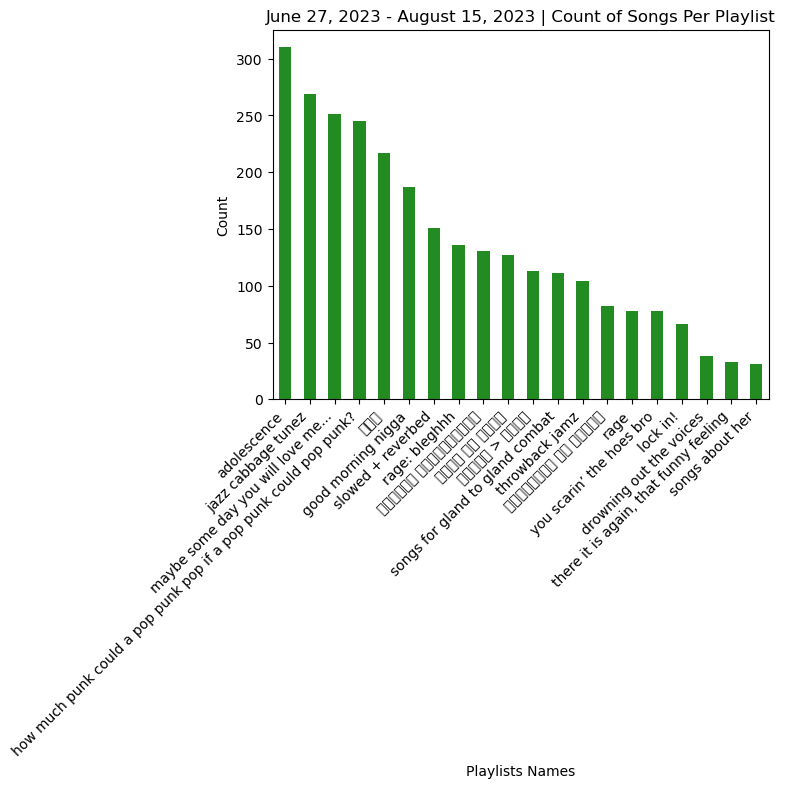

In [54]:
pd.value_counts(playlists['name']).head(20).plot(kind='bar', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('June 27, 2023 - August 15, 2023 | Count of Songs Per Playlist')
plt.ylabel('Count')
plt.xlabel('Playlists Names')
figsize=(80,80)
# emojis in some of my playlist names :(

## Goal: Timeline of the last time each playlists was modified

In [ ]:
# Pull columns: 'name' and 'lastModifiedDate'
# Note: 'Nan' value is in the 'lastModifiedDate' column because we did not extend the previous value like we did tor the 'name column'
playlists[['name','lastModifiedDate']]

In [ ]:
playlists[['name','lastModifiedDate']].dropna() # selecting two columns and dropping rows with NaN/no date values in the 'lastModifiedDate' column

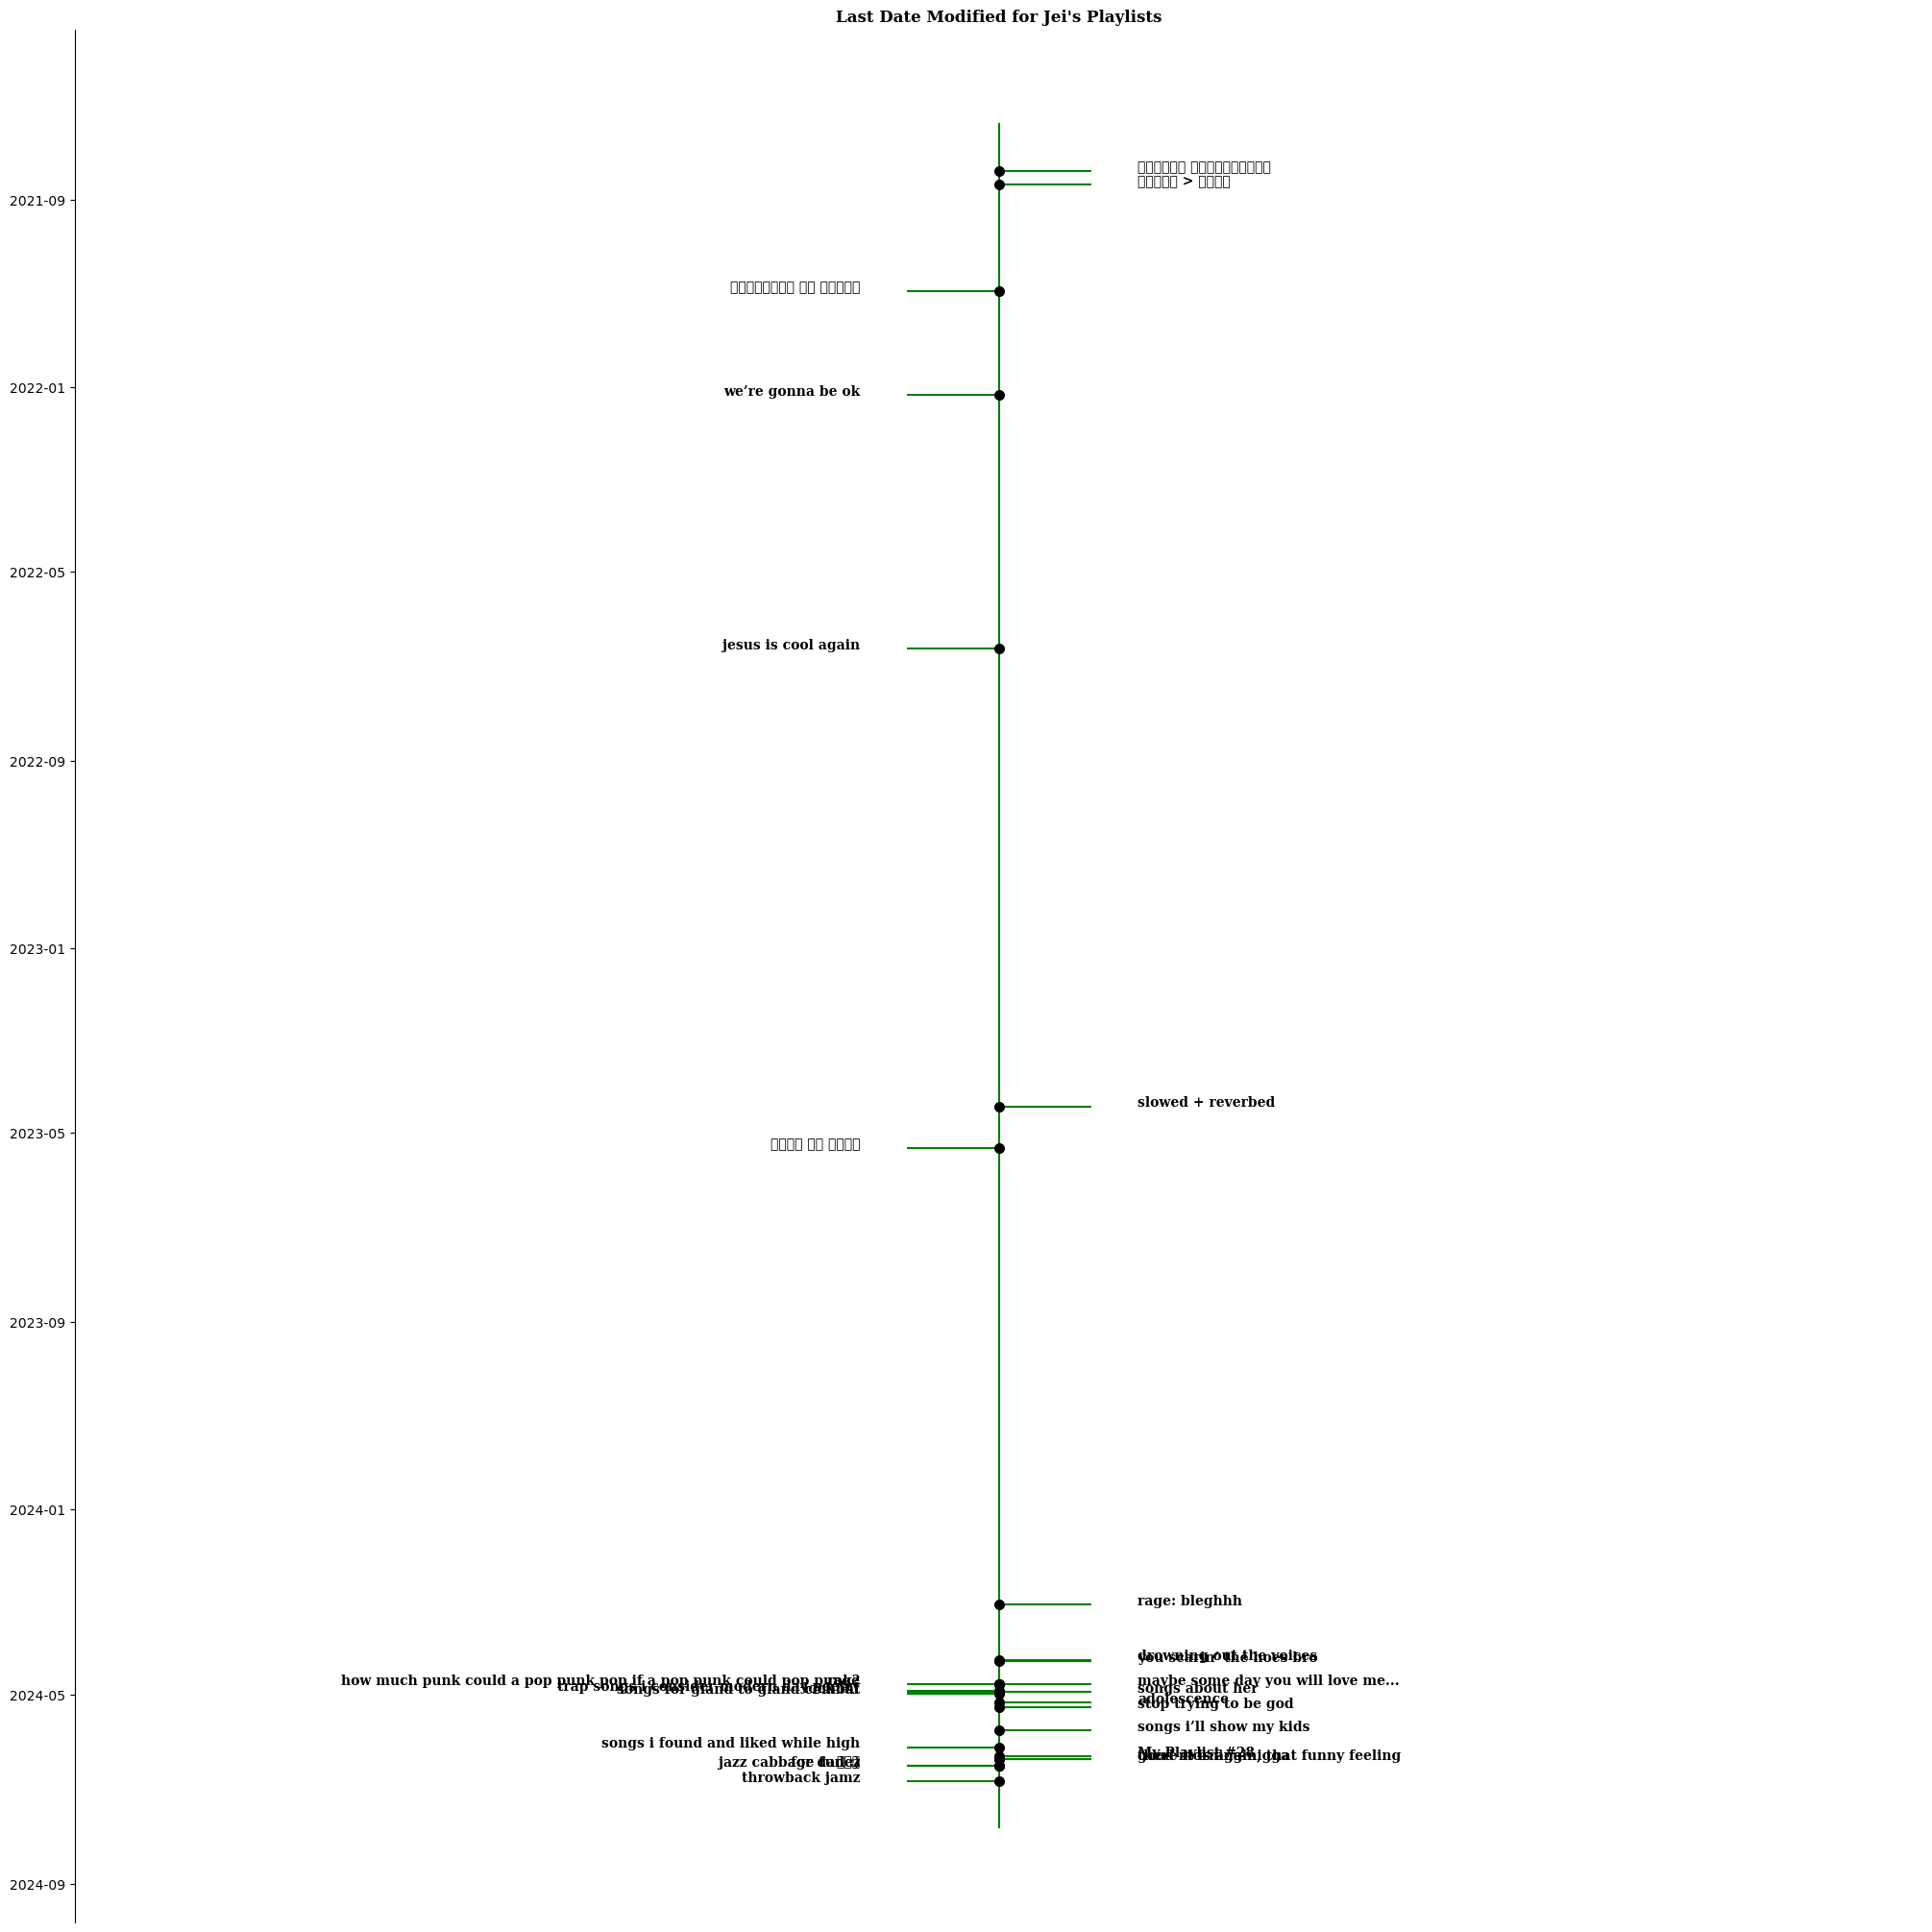

In [55]:
# packages used to execute this section
import _strptime
from datetime import timedelta
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

%matplotlib inline
# Assigning a variable to the list of 'lastModifiedDate' values-without null values
dates=playlists['lastModifiedDate'].dropna()
# Convert date strings (e.g. 2020-10-12) to datetime
dates=[datetime.strptime(d, '%Y-%m-%d') for d in dates]

min_dates = date(np.min(dates).year, np.min(dates).month - 3, np.min(dates).day)
max_dates = date(np.max(dates).year, np.max(dates).month + 3, np.max(dates).day) # editing the length of the time covered on the line -displaying the timeframe plus 3 months before & after
names=playlists['name'].unique() # variable assigned to playlist names, unique so none are repeated

labels = ['{0:%d %b %Y}:\n{1}'.format(d, name) for name, d in zip(names, dates)] # labels with associated dates

fig, ax = plt.subplots(figsize=(20,20), constrained_layout=True) # size of visual
_ = ax.set_xlim(-20, 20)
_ = ax.set_ylim(max_dates, min_dates)
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='green', zorder=1) #features of the vertical line

_ = ax.scatter(np.zeros(len(dates)), dates, s=45, c='black', zorder = 2) # dots on vertical line signifying when modified
_ = ax.scatter(np.zeros(len(dates)), dates, s=45, c='black', zorder = 3) # more dots lol

label_offsets = np.repeat(3.0, len(dates)) # left and right spacing of labels
label_offsets [1::2] = -3.0 # space between left and right labels
for i, (name, d) in enumerate(zip(names, dates)):
    d = d - timedelta(days=0) # positioning accuracy of the dates
    align = 'right'
    vertical_offset = 30
    if i % 2 == 0:
        align = 'left'
    _ = ax.text(label_offsets[i], d, name, ha=align, fontfamily='serif', fontweight='bold', color='black', fontsize=10)

# more formatting
stems = np.repeat(2.0, len(dates)) # length of vertical lines
stems[1::2] *= -1.0 # length of vertical lines on the left side of the line graph
x = ax.hlines(dates, 0, stems, color='green') #vertical lines color

# hiding lines around the chart
for spine in ['right', 'top', 'bottom']:
    _ = ax.spines[spine].set_visible(False)

# hide tick labels
_ = ax.set_xticks([]) # hiding x-axis intervals

#Note to self: '\s' needs to be added when using an apostrophe otherwise python will think its a quote
_ = ax.set_title('Last Date Modified for Jei\'s Playlists', fontweight='bold', fontfamily='serif', fontsize=12, color='black')

In [ ]:
Findings throughout project: Excel is so much easier, faster, and intuitive to pre-process and clean data than doing it in python.

In [56]:
file_name = 'playlist_modifiedtime_timeline_for_tableau.xlsx'
playlists.to_excel('playlist_modifiedtime_timeline_for_tableau.xlsx')
print('DataFrame is written to Excel File successfully.')
# this is me exporting the df for playlists to excel so i can redo the timeline and create a dashboard but in tableau!

DataFrame is written to Excel File successfully.


## Timeline of Playlist Modifications Done W/ Tableau

In [9]:
Image(url="Screen Shot 2024-07-08 at 12.31.48 PM.png", width=1000, height=1000)

### And for fun, I made two word clouds as well showing the frequency of albums and artists within ALL my playlists and each individual playlist using filters!

In [11]:
Image(url="Screen Shot 2024-07-08 at 4.33.37 PM.png", width=1000, height=1000)

In [23]:
Image(url="Screen Shot 2024-07-08 at 7.00.55 PM.png", width=1000, height=1000)

In [ ]:
With the above visuals, you can easily see which artists and/or albums take the spotlight within my playlist!

### My Final Dashboard

In [27]:
Image(url="Screen Shot 2024-07-09 at 5.13.07 AM.png", width=1000, height=1000)